In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Resources/CaloriesIntensityUpload2.csv')
df

,Id,Time,Intensity,Calories,DateHour,Date,TimeofDay
0,1503960366,0:00:00,10,66,2016-04-24T00:00:00Z,4/24/2016,Night
1,1503960366,0:00:00,1,51,2016-04-30T00:00:00Z,4/30/2016,Night
2,1624580081,0:00:00,1,51,2016-04-14T00:00:00Z,4/14/2016,Night
3,1624580081,0:00:00,1,51,2016-04-21T00:00:00Z,4/21/2016,Night
4,1624580081,0:00:00,1,51,2016-04-22T00:00:00Z,4/22/2016,Night
...,...,...,...,...,...,...,...
22094,5553957443,22:00:00,25,114,2016-05-10T22:00:00Z,5/10/2016,Evening
22095,7086361926,22:00:00,20,114,2016-04-30T22:00:00Z,4/30/2016,Evening
22096,1644430081,23:00:00,8,114,2016-04-16T23:00:00Z,4/16/2016,Night
22097,4445114986,23:00:00,22,114,2016-04-28T23:00:00Z,4/28/2016,Night


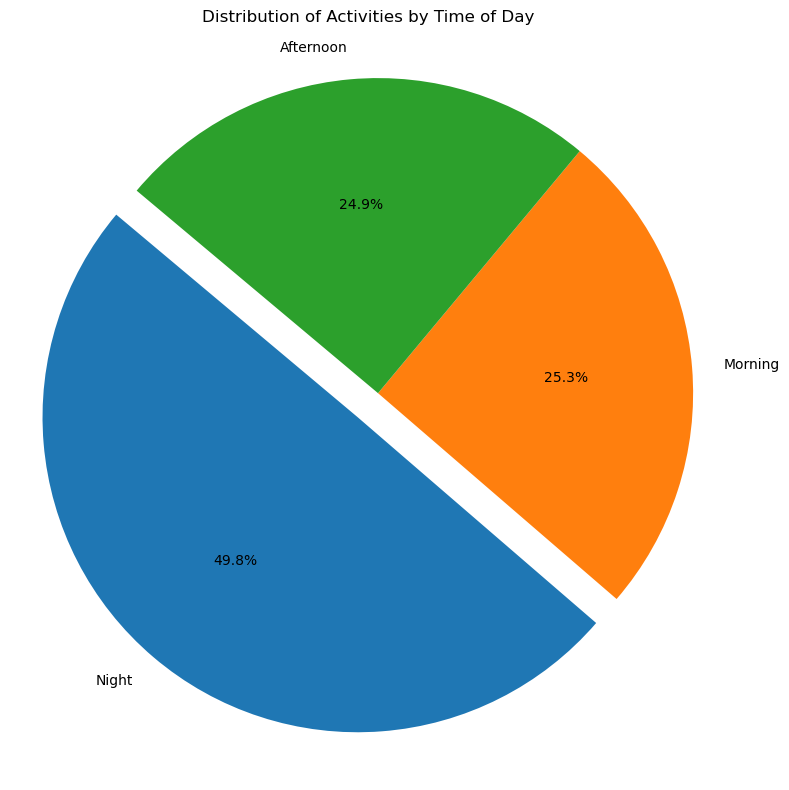

In [3]:
df['TimeofDay'] = df['TimeofDay'].replace({'Evening': 'Night'})
tod_counts = df['TimeofDay'].value_counts()

labels = tod_counts.index
sizes = tod_counts.values
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Activities by Time of Day')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [4]:
intensity_df = pd.read_csv('Resources/hourlyIntensities_mergedv2.csv')
intensity_df

,Id,ActivityHour,Time,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 0:00,12:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00,1:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00,2:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00,3:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00,4:00 AM,0,0.000000
...,...,...,...,...,...
22094,8877689391,5/12/2016 10:00,10:00 AM,12,0.200000
22095,8877689391,5/12/2016 11:00,11:00 AM,29,0.483333
22096,8877689391,5/12/2016 12:00,12:00 PM,93,1.550000
22097,8877689391,5/12/2016 13:00,1:00 PM,6,0.100000


In [5]:
plt.bar(intensity_df['Time'], intensity_df['TotalIntensity'])
plt.xticks(rotation='vertical')
plt.title('Total Intensity Level by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Intensity Level')
plt.show()

In [ ]:
calories_df = pd.read_csv('Resources/hourlyCalories_merged.csv')
calories_df.head()

,Id,ActivityHour,Time,Calories
0,1503960366,4/12/2016 0:00,0:00:00,81
1,1503960366,4/12/2016 1:00,1:00:00,61
2,1503960366,4/12/2016 2:00,2:00:00,59
3,1503960366,4/12/2016 3:00,3:00:00,47
4,1503960366,4/12/2016 4:00,4:00:00,48


In [ ]:
calories_df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
calories_df['Hour'] = pd.to_datetime(calories_df['Time'].astype(str)).dt.hour
hourly_avg_calories = calories_df.groupby('Hour')['Calories'].mean()
hourly_avg_calories

C:\Users\lukej\AppData\Local\Temp\ipykernel_17196\3804813445.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calories_df['Hour'] = pd.to_datetime(calories_df['Time'].astype(str)).dt.hour


Hour
0      93.838330
1      97.440514
2     100.018221
3      95.631297
4      99.763948
5      99.836910
6      98.087003
7      95.593985
8      87.242750
9      92.980666
10    109.837460
11    111.732470
12     91.905640
13     88.155266
14    103.686211
15    102.592350
16    104.748622
17    105.121413
18     87.558499
19     89.486755
20     93.633554
21     90.208840
22    100.001106
23     97.992248
Name: Calories, dtype: float64

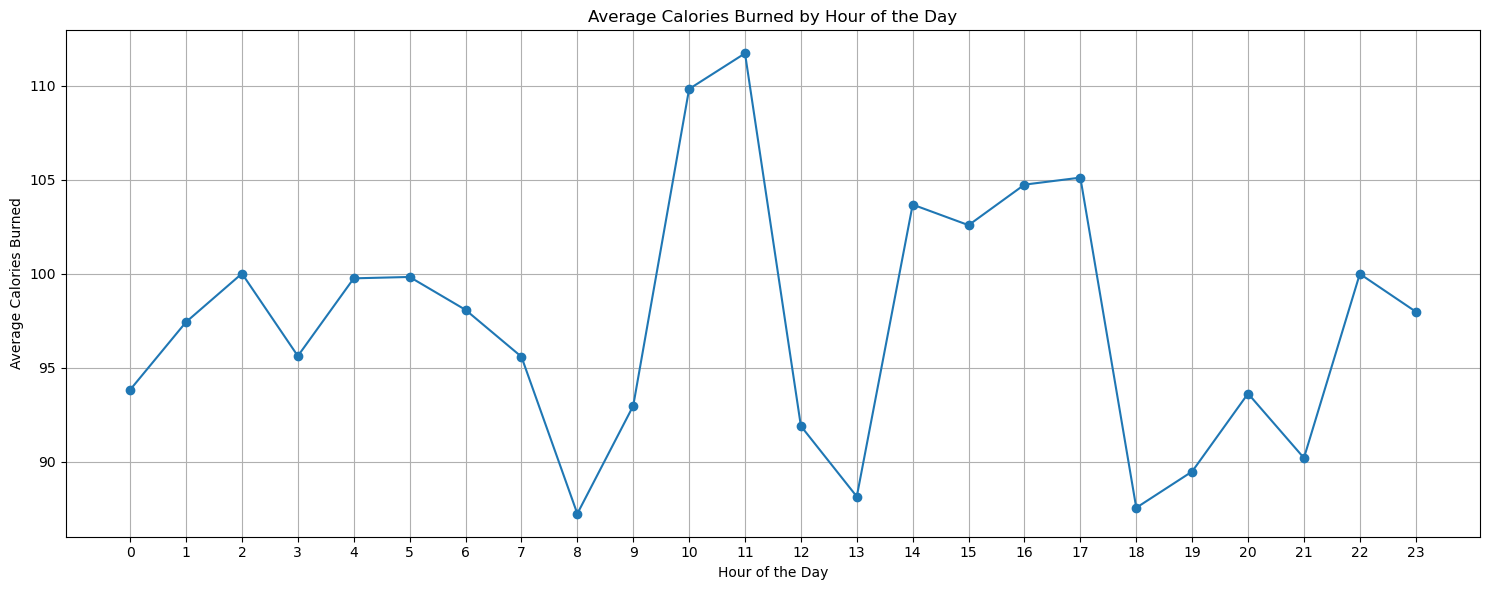

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(hourly_avg_calories.index, hourly_avg_calories.values, marker='o', linestyle='-')
plt.title('Average Calories Burned by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories Burned')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()